In [1]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Entrenamiento:

En este notebook se realiza el entrenamiento del modelo propuesto. Para esto, necesito conseguir las TAE de los audios y sus labels (es decir, el valor de tr al que quiero aproximar)

In [16]:
#Librerías necesarias:
import sys 
sys.path.append('/content/drive/My Drive/Tesis/Notebooks/scripts')
from tae import TAE
from model import modelo
from preprocessing import preprocessing

import numpy as np
import os
from librosa import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randrange

In [3]:
#Carpeta principal de mi ssd:
os.chdir("/content")
#Creo carpeta para guardar los audios:
os.mkdir("Base de datos")
#Me muevo a esa carpeta:
os.chdir("/content/Base de datos")

#Descomprimo los audios en la ssd:
MAIN_PATH="/content/drive/My Drive/Tesis/Base de datos"
#traigo el archivo a la ssd
tar_path = os.path.join(MAIN_PATH, 'ACE_RIRs_Sinteticas.tar.gz')
!cp "{tar_path}" .

#descomprimo la carpeta
!tar -xvf 'ACE_RIRs_Sinteticas.tar.gz'
!rm 'ACE_RIRs_Sinteticas.tar.gz'

Se han truncado las últimas 5000 líneas del flujo de salida.
./M5s3_Seed3383935027_Tr2.9.wav
./F4s3_Seed382792371_Tr0.9.wav
./M3s3_Seed560527016_Tr1.8.wav
./F2s3_Seed1215603597_Tr0.5.wav
./F2s3_Seed3715081020_Tr2.8.wav
./M4s3_Seed637010429_Tr1.4.wav
./M5s3_Seed2185021112_Tr1.8.wav
./F3s3_Seed1895422622_Tr0.5.wav
./M3s3_Seed2538820119_Tr1.9.wav
./F2s3_Seed2463685778_Tr2.1.wav
./F2s3_Seed49637341_Tr2.9.wav
./F5s3_Seed1365318602_Tr3.0.wav
./F5s3_Seed3401392397_Tr0.6.wav
./M3s3_Seed1182092759_Tr0.2.wav
./M2s3_Seed2688854572_Tr0.3.wav
./F4s3_Seed274753243_Tr2.7.wav
./M2s3_Seed1480924628_Tr0.6.wav
./M5s3_Seed1968844860_Tr0.5.wav
./F5s3_Seed3958507829_Tr2.2.wav
./M1s3_Seed1270728679_Tr2.3.wav
./M1s3_Seed3178121625_Tr2.8.wav
./M1s3_Seed1068244190_Tr0.4.wav
./F5s3_Seed221194221_Tr2.6.wav
./M2s3_Seed2392956570_Tr1.4.wav
./M5s3_Seed306079345_Tr2.9.wav
./M1s3_Seed217563755_Tr2.7.wav
./F4s3_Seed1363790060_Tr0.6.wav
./F5s3_Seed925845462_Tr1.5.wav
./M5s3_Seed3163454162_Tr0.8.wav
./M1s3_Seed350602144_

In [4]:
# Obtengo los nombres de los audios:
path = '/content/Base de datos'
files_name = os.listdir(path)

print(len(files_name))

29000


In [5]:
#Calculo los TAE para la banda de 1000 Hz:
BAND = 1000

tae, T30_1000 = preprocessing(files_name=files_name, band=BAND)

In [6]:
#Separo en train y test:
X, y = tae, T30_1000 #Defino mi data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Cargo el modelo:
blind_estimation_model = modelo()

#Descripción:
blind_estimation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Audio de entrada (InputLaye  [(None, 200, 1)]         0         
 r)                                                              
                                                                 
 capa1_conv (Conv1D)         (None, 191, 32)           352       
                                                                 
 capa1_pool (MaxPooling1D)   (None, 95, 32)            0         
                                                                 
 Batch_capa1 (BatchNormaliza  (None, 95, 32)           128       
 tion)                                                           
                                                                 
 capa2_conv (Conv1D)         (None, 91, 16)            2576      
                                                                 
 capa2_pool (MaxPooling1D)   (None, 45, 16)            0     

In [9]:
#Entreno el modelo:
X_train = np.array(X_train)
y_train = np.array(y_train)
history = blind_estimation_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=100)

Epoch 1/100
164/164 [==============================] - 14s 8ms/step - loss: 0.6101 - val_loss: 0.7496
Epoch 2/100
164/164 [==============================] - 1s 6ms/step - loss: 0.1346 - val_loss: 0.8093
Epoch 3/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0898 - val_loss: 0.3512
Epoch 4/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0691 - val_loss: 0.0634
Epoch 5/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0602 - val_loss: 0.0374
Epoch 6/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0517 - val_loss: 0.0319
Epoch 7/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0473 - val_loss: 0.0260
Epoch 8/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0434 - val_loss: 0.0349
Epoch 9/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0389 - val_loss: 0.0279
Epoch 10/100
164/164 [==============================] - 1s 6ms/step - loss: 0.0356 - val_l

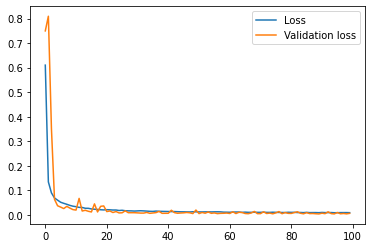

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [17]:
# Realizo predicciones:
n_predicts = 10
predict = [randrange(len(y_test)) for i in range(n_predicts)]

for p in predict:
  prediction = blind_estimation_model.predict(X_test[p,:,0].reshape(1,-1,1))
  real = y_test[p]

  print(f'Valor predecido: {prediction} [s]')
  print(f'Valor real: {real} [s]')
  print('--------------------------------')

Valor predecido: [[0.6450598]] [s]
Valor real: 0.6 [s]
--------------------------------
Valor predecido: [[2.3049169]] [s]
Valor real: 2.3 [s]
--------------------------------
Valor predecido: [[0.26236254]] [s]
Valor real: 0.3 [s]
--------------------------------
Valor predecido: [[1.8737772]] [s]
Valor real: 2.0 [s]
--------------------------------
Valor predecido: [[0.27119496]] [s]
Valor real: 0.3 [s]
--------------------------------
Valor predecido: [[0.48112455]] [s]
Valor real: 0.5 [s]
--------------------------------
Valor predecido: [[2.8559172]] [s]
Valor real: 2.9 [s]
--------------------------------
Valor predecido: [[1.4279792]] [s]
Valor real: 1.4 [s]
--------------------------------
Valor predecido: [[0.6630112]] [s]
Valor real: 0.6 [s]
--------------------------------
Valor predecido: [[1.9363074]] [s]
Valor real: 2.0 [s]
--------------------------------


In [18]:
#Guardo los pesos del modelo:
blind_estimation_model.save_weights('/content/drive/My Drive/Tesis/Modelos/T30estimation_epochs100_band1000.hdf5')

In [19]:
# Para cargar los pesos:
blind_estimation_model = modelo()
blind_estimation_model.load_weights('/content/drive/My Drive/Tesis/Modelos/T30estimation_epochs100_band1000.hdf5')

In [20]:
# Realizo más predicciones para ver si cargó bien:
n_predicts = 10
predict = [randrange(len(y_test)) for i in range(n_predicts)]

for p in predict:
  prediction = blind_estimation_model.predict(X_test[p,:,0].reshape(1,-1,1))
  real = y_test[p]

  print(f'Valor predecido: {prediction} [s]')
  print(f'Valor real: {real} [s]')
  print('--------------------------------')

Valor predecido: [[1.2845023]] [s]
Valor real: 1.3 [s]
--------------------------------
Valor predecido: [[2.2008822]] [s]
Valor real: 2.1 [s]
--------------------------------
Valor predecido: [[1.9127748]] [s]
Valor real: 1.8 [s]
--------------------------------
Valor predecido: [[1.6056478]] [s]
Valor real: 1.5 [s]
--------------------------------
Valor predecido: [[2.7533395]] [s]
Valor real: 2.7 [s]
--------------------------------
Valor predecido: [[1.4871073]] [s]
Valor real: 1.5 [s]
--------------------------------
Valor predecido: [[0.69169307]] [s]
Valor real: 0.7 [s]
--------------------------------
Valor predecido: [[1.110821]] [s]
Valor real: 1.1 [s]
--------------------------------
Valor predecido: [[2.5260618]] [s]
Valor real: 2.5 [s]
--------------------------------
Valor predecido: [[2.9049633]] [s]
Valor real: 3.0 [s]
--------------------------------
